In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
# Display top 5 rows
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [4]:
# Show information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [5]:
# Check for missing values
print(df.isnull().sum())

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64


In [6]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [7]:
# Check the unique values in 'online_order' and 'book_table' columns
online_order_unique_values = df['online_order'].unique()
book_table_unique_values = df['book_table'].unique()

online_order_unique_values, book_table_unique_values

(array(['Yes', 'No', " ('Rated 4.0'", ...,
        ' ""RATED\\n  Truly what a wonderful place. From the walk through the green route to the actual place',
        ' dirty tables etc... is really a turn off...\\n\\nFood - 7/10\\n\\nVeg Nachos - Lacks the punch... wish the salsa tasted better... nd also wud be grt if u cud introduce an option without gluocumole (not really a fan of it)\\n\\nVeg Sheek Kabab - Tasted Grt',
        " 'RATED\\n  Beer cafe "], dtype=object),
 array(['Yes', 'No', " 'RATED\\n  Amazing cafe", ...,
        ' ""RATED\\n  A decent place to have some traditional oriental cuisine. We were craving for some kick-ass noodles. While we did get the noodles',
        ' but cud be a bit less spicy... otherwise was grt',
        'VR Bengaluru\\nBeen here a few times '], dtype=object))

In [8]:
# Keep only the rows where 'online_order' and 'book_table' are either 'Yes' or 'No'
df_cleaned = df[df['online_order'].isin(['Yes', 'No']) & df['book_table'].isin(['Yes', 'No'])]

# Display the unique values in 'online_order' and 'book_table' in the cleaned data
online_order_unique_values_cleaned = df_cleaned['online_order'].unique()
book_table_unique_values_cleaned = df_cleaned['book_table'].unique()

online_order_unique_values_cleaned, book_table_unique_values_cleaned

(array(['Yes', 'No'], dtype=object), array(['Yes', 'No'], dtype=object))

In [9]:
# Check the unique values in 'rate' column
rate_unique_values = df_cleaned['rate'].unique()
rate_unique_values

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
# Remove '/5' from 'rate' column and convert it to numeric values
df_cleaned['rate'] = df_cleaned['rate'].str.replace('/5', '')
df_cleaned['rate'] = df_cleaned['rate'].replace(['NEW', '-'], '0')

# Convert the 'rate' column to numeric type
df_cleaned['rate'] = pd.to_numeric(df_cleaned['rate'], errors='coerce')

# Check the unique values in 'rate' column after cleaning
rate_unique_values_cleaned = df_cleaned['rate'].unique()
rate_unique_values_cleaned

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\3858866618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].str.replace('/5', '')
C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\3858866618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].replace(['NEW', '-'], '0')
C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\3858866618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [11]:
# Check the unique values in 'votes' column
votes_unique_values = df_cleaned['votes'].unique()
votes_unique_values

array(['775', '787', '918', ..., '4957', '2382', '843'], dtype=object)

In [12]:
# Convert the 'votes' column to numeric type
df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')

# Check the unique values in 'votes' column after conversion
votes_unique_values_cleaned = df_cleaned['votes'].unique()
votes_unique_values_cleaned

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\2554297645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')


array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [13]:
# Check the unique values in 'approx_cost(for two people)' column
approx_cost_unique_values = df_cleaned['approx_cost(for two people)'].unique()
approx_cost_unique_values

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
# Remove comma separators and convert the 'approx_cost(for two people)' column to numeric type
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '')
df_cleaned['approx_cost(for two people)'] = pd.to_numeric(df_cleaned['approx_cost(for two people)'], errors='coerce')

# Check the unique values in 'approx_cost(for two people)' column after cleaning
approx_cost_unique_values_cleaned = df_cleaned['approx_cost(for two people)'].unique()
approx_cost_unique_values_cleaned

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\888381943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].str.replace(',', '')
C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\888381943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['approx_cost(for two people)'] = pd.to_numeric(df_cleaned['approx_cost(for two people)'], errors='coerce')


array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [15]:
# Fill missing values in 'rate' and 'votes' with 0
df_cleaned['rate'] = df_cleaned['rate'].fillna(0)
df_cleaned['votes'] = df_cleaned['votes'].fillna(0)

# Fill missing values in 'approx_cost(for two people)' with the median cost
median_cost = df_cleaned['approx_cost(for two people)'].median()
df_cleaned['approx_cost(for two people)'] = df_cleaned['approx_cost(for two people)'].fillna(median_cost)

# Check for missing values in the cleaned dataset
missing_values_cleaned = df_cleaned.isnull().sum()
missing_values_cleaned

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\2215034318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['rate'] = df_cleaned['rate'].fillna(0)
C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\2215034318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['votes'] = df_cleaned['votes'].fillna(0)
C:\Users\SAMEER\AppData\Local\Temp\ipykernel_15368\2215034318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
listed_in(type)                 4361
dtype: int64

In [16]:
# Display the first few rows of the cleaned dataset
df_cleaned.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


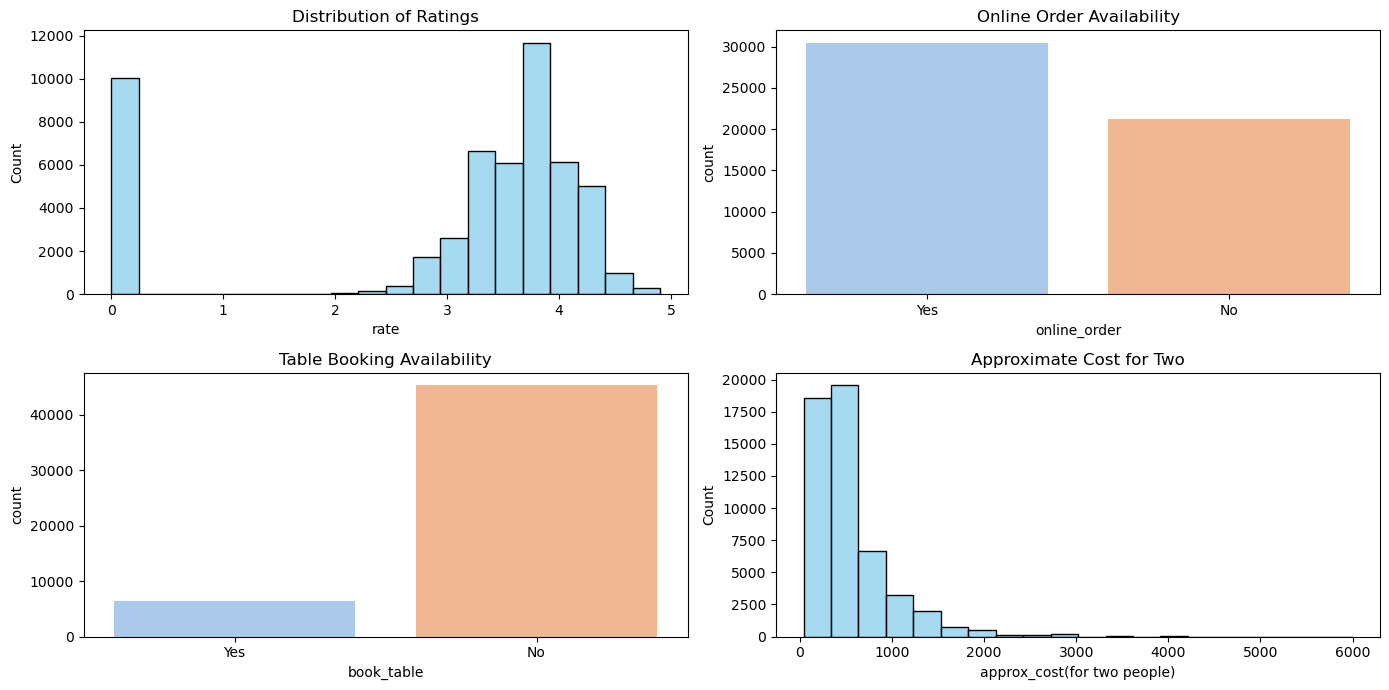

In [17]:
# Define the figure size
plt.figure(figsize=(14, 7))

# Distribution of Ratings
plt.subplot(221)
sns.histplot(df_cleaned['rate'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Ratings')

# Online Order Availability
plt.subplot(222)
sns.countplot(x='online_order', data=df_cleaned, palette='pastel')
plt.title('Online Order Availability')

# Table Booking Availability
plt.subplot(223)
sns.countplot(x='book_table', data=df_cleaned, palette='pastel')
plt.title('Table Booking Availability')

# Approximate Cost for Two
plt.subplot(224)
sns.histplot(df_cleaned['approx_cost(for two people)'], bins=20, kde=False, color='skyblue')
plt.title('Approximate Cost for Two')

# Adjust the layout
plt.tight_layout()

plt.show()

In [18]:
from collections import Counter

# Helper function to get the most common terms in a column
def get_most_common_terms(series, top_n=10):
    # Split the series into a list of terms
    terms_list = series.dropna().str.split(', ').sum()
    
    # Count the terms and get the most common ones
    most_common_terms = Counter(terms_list).most_common(top_n)
    
    return most_common_terms

# Get the top 10 cuisines, restaurant types, and locations
top_cuisines = get_most_common_terms(df_cleaned['cuisines'])
top_rest_types = get_most_common_terms(df_cleaned['rest_type'])
top_locations = get_most_common_terms(df_cleaned['location'])

top_cuisines, top_rest_types, top_locations

([('North Indian', 21085),
  ('Chinese', 15547),
  ('South Indian', 8644),
  ('Fast Food', 8096),
  ('Biryani', 6492),
  ('Continental', 5765),
  ('Desserts', 5633),
  ('Cafe', 5303),
  ('Beverages', 4747),
  ('Italian', 3389)],
 [('Quick Bites', 20639),
  ('Casual Dining', 13057),
  ('Cafe', 5074),
  ('Delivery', 4641),
  ('Dessert Parlor', 3211),
  ('Bar', 2457),
  ('Takeaway', 2157),
  ('Bakery', 1998),
  ('Beverage Shop', 1471),
  ('Pub', 950)],
 [('BTM', 5124),
  ('HSR', 2523),
  ('Koramangala 5th Block', 2504),
  ('Whitefield', 2374),
  ('JP Nagar', 2235),
  ('Indiranagar', 2083),
  ('Jayanagar', 1926),
  ('Marathahalli', 1846),
  ('Bannerghatta Road', 1630),
  ('Bellandur', 1286)])

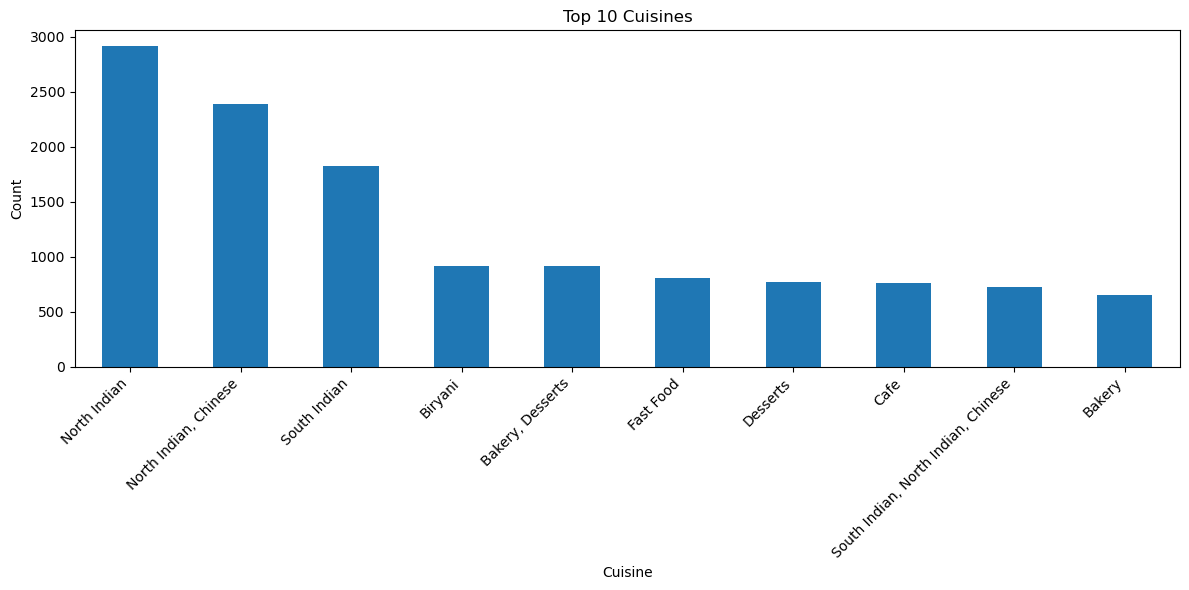

In [19]:
# Bar chart of top cuisines
top_cuisines = df_cleaned['cuisines'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_cuisines.plot(kind='bar')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

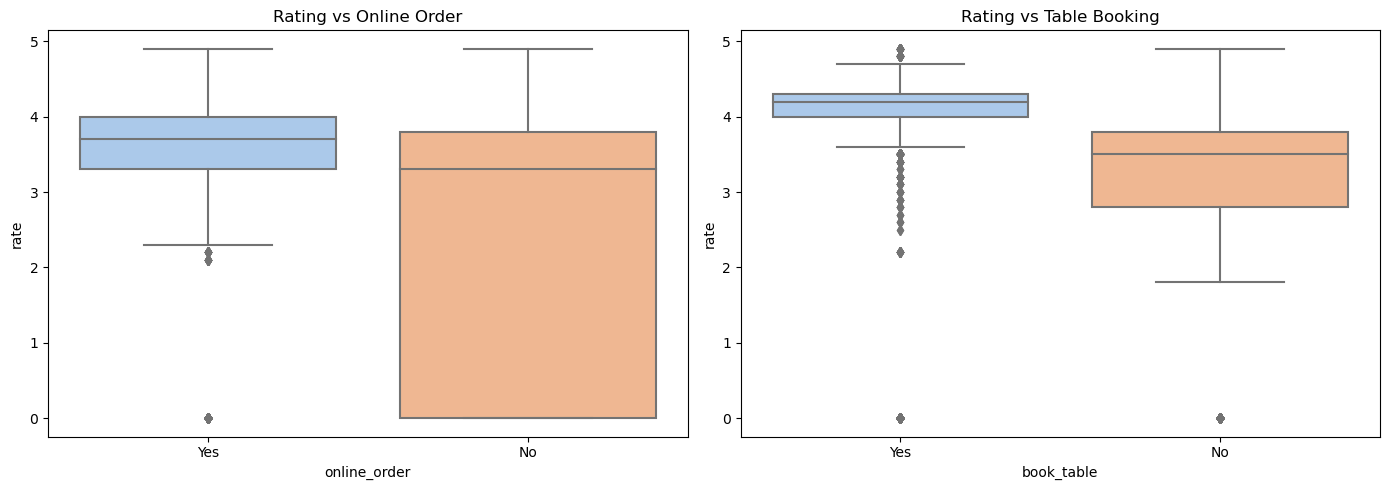

In [20]:
# Define the figure size
plt.figure(figsize=(14, 5))

# Rating vs Online Order
plt.subplot(121)
sns.boxplot(x='online_order', y='rate', data=df_cleaned, palette='pastel')
plt.title('Rating vs Online Order')

# Rating vs Table Booking
plt.subplot(122)
sns.boxplot(x='book_table', y='rate', data=df_cleaned, palette='pastel')
plt.title('Rating vs Table Booking')

# Adjust the layout
plt.tight_layout()

plt.show()

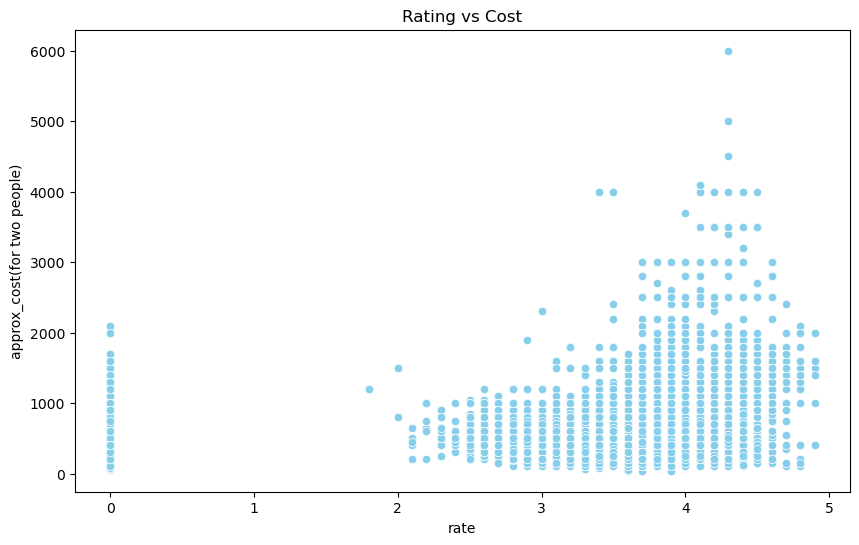

In [21]:
# Rating vs Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate', y='approx_cost(for two people)', data=df_cleaned, color='skyblue')
plt.title('Rating vs Cost')
plt.show()

In [22]:
# Calculate the average cost and average rating for each location
location_analysis = df_cleaned.groupby('location').agg({'approx_cost(for two people)': 'mean', 'rate': 'mean'}).reset_index()

# Rename the columns
location_analysis.columns = ['location', 'average_cost', 'average_rating']

# Display the first few rows of the result
location_analysis.head()

,location,average_cost,average_rating
0,BTM,396.498829,2.740984
1,Banashankari,421.225166,2.997241
2,Banaswadi,397.063253,2.527259
3,Bannerghatta Road,443.331288,2.657485
4,Basavanagudi,360.979532,3.193421


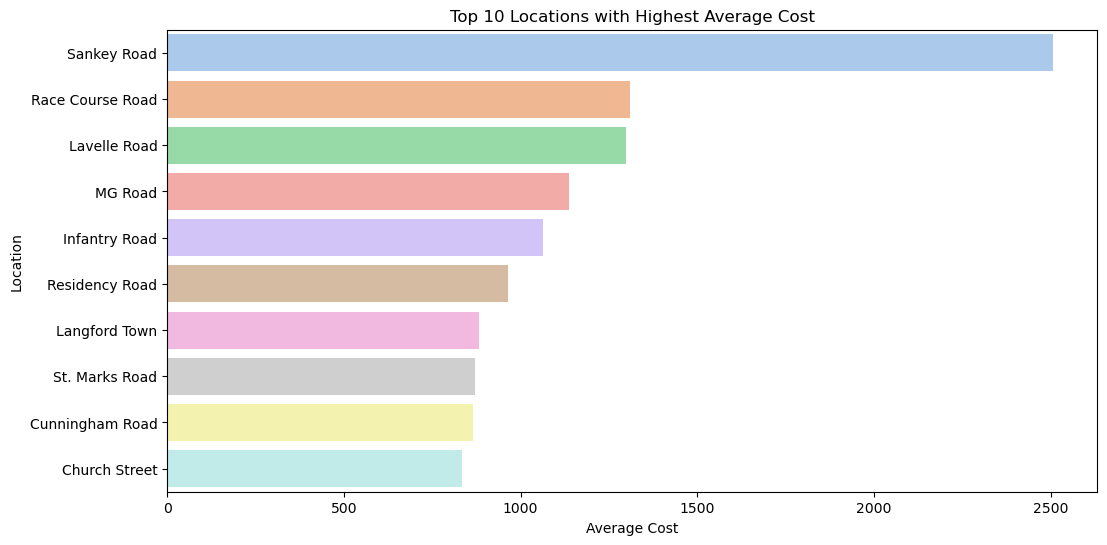

In [23]:
# Get the top 10 locations with the highest average cost
top_cost_locations = location_analysis.sort_values('average_cost', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='average_cost', y='location', data=top_cost_locations, palette='pastel')
plt.title('Top 10 Locations with Highest Average Cost')
plt.xlabel('Average Cost')
plt.ylabel('Location')
plt.show()

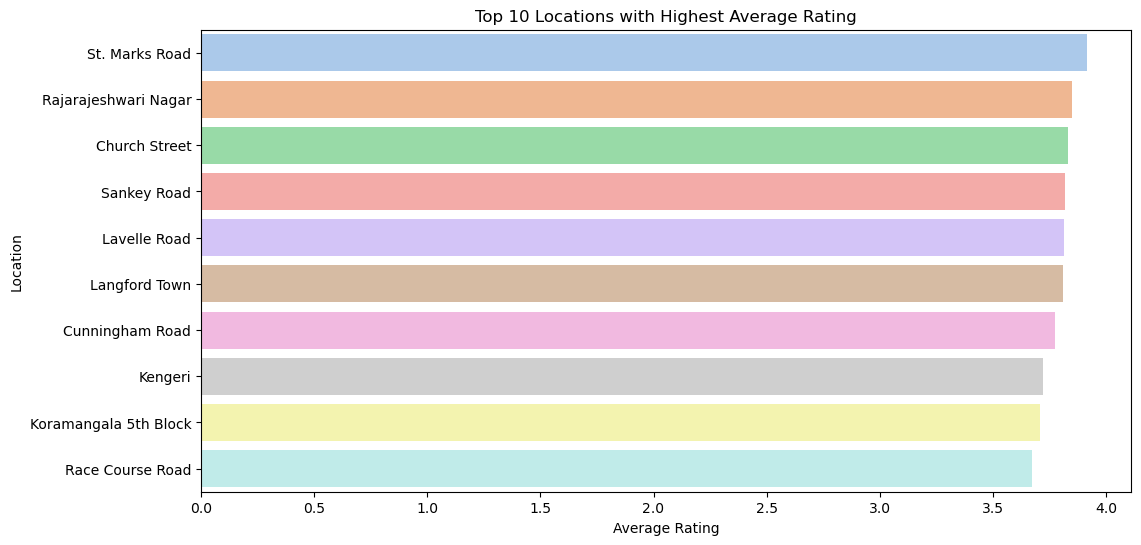

In [24]:
# Get the top 10 locations with the highest average rating
top_rating_locations = location_analysis.sort_values('average_rating', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='average_rating', y='location', data=top_rating_locations, palette='pastel')
plt.title('Top 10 Locations with Highest Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()


## Insights :

* The majority of rated restaurants cluster between 3.5 and 4.5, suggesting generally positive ratings.
* Very few restaurants have perfect 5-star ratings.
* Peoples buy food more by online and less offline
* A vast majority of restaurants do not offer table booking services
* Only a small fraction of restaurants provide table booking options.
* This could indicate an opportunity for expansion of table booking services in the market.
* Peoples usually eat North india, chinese, south india food more
* No matter whether buy food online or visit offline the food is delicious and rating are 4+
* Whether peoples book table online or dont the rating is very little, peoples who book table online give 4+ rating and direct visit peoples give 3+ ratings
* Approx cost of two or more persons give more ratings
* The distribution of costs is heavily right-skewed.
* A large number of restaurants fall in the lower price range (0-1000 price units).
* There's a long tail extending towards higher prices, indicating a smaller number of more expensive restaurants.
* Very few restaurants have extremely high prices (above 3000 price units).

* Overall insights:

* The restaurant market seems diverse in terms of ratings and pricing.
* Online ordering is widely adopted, while table booking is less common.
* There might be an opportunity to encourage more restaurants to offer table booking services.

## Suggestion :

1. Price Optimization:

* For high-rated restaurants in lower-cost areas, consider slight price increases as the data suggests quality can command higher prices.

* For lower-rated restaurants in high-cost areas, focus on improving quality to justify the prices.

2. Service Expansion:

* Consider adding online ordering if not already available, as it's a popular feature among customers.
* Evaluate the potential benefits of adding table booking services, especially in high-end locations.

3. Location Strategy:

* For new restaurants, consider opening in areas with high average ratings but lower costs to balance quality expectations with profitability.
* Zomato’s business team can target Locations that have least number of restaurants with book table and online order facility.

4. Price-Quality Balance:

* Aim for the sweet spot in the price-rating correlation, offering good value for money to attract more customers.